In [3]:
"""
Created on Thu Apr 16 17:25:36 2020

@author: maddalena
"""
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import matplotlib.gridspec as gridspec

In [4]:
# The SIR model differential equations.
def deriv(y, t, N, beta,gamma):
    S,I,R = y

    dSdt = -(beta*I/N)*S 
    dIdt = (beta*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt

In [5]:
#Integration of the differential equations
    
def time_evo(N,beta,gamma,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N,beta,gamma))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,R)

In [6]:
#Show the result

fin_result=time_evo(1000,0.5,0.1)

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]

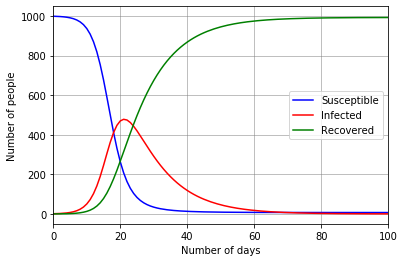

In [7]:
#SIR MODEL PLOT

plt.plot(t, s_vec, 'b', label='Susceptible')
plt.plot(t, i_vec, 'r', label='Infected')
plt.plot(t, r_vec, 'g', label='Recovered')
#plt.plot(t, m_vec, 'k', label='Deaths')
#plt.plot(t, i_vec+r_vec, color='orange',linestyle='--', label='Infected + Recovered')
plt.legend(loc=5)
#plt.yscale('log')
#plt.ylim(0.5,3000)
plt.xlim(0,100)
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.savefig('plotsir05.png',dpi=300)
plt.show()

In [8]:
#IMPORT FILES WORLD
#i files sono: le righe sono le nazioni, le colonne i giorni del mese (DATE).

file_confirmed='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
file_deaths='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
file_recovered='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df_confirmed=pd.read_csv(file_confirmed)
df_deaths=pd.read_csv(file_deaths)
df_recovered=pd.read_csv(file_recovered)

In [9]:
#Data manipulation and representation (World)

deaths_world=df_deaths.iloc[:,-1].sum()
recovered_world=df_recovered.iloc[:,-1].sum()
total_world=df_confirmed.iloc[:,-1].sum()

max_death_rate=round(deaths_world/(deaths_world+recovered_world)*100,1)
min_death_rate=round(deaths_world/total_world*100,1)

print('Total contaminated:',total_world)
print('Total deaths:',deaths_world)
print('Total recovered:',recovered_world)

print('Based on the WHO data, the death rate is between',min_death_rate,'% and',max_death_rate,'% of the confirmed case')

Total contaminated: 2623413
Total deaths: 183025
Total recovered: 709694
Based on the WHO data, the death rate is between 7.0 % and 20.5 % of the confirmed case


In [10]:
def mortality_rate(f_asympt):
    recovered_tot=recovered_world+f_asympt*total_world
    return deaths_world/(deaths_world+recovered_tot)

print(mortality_rate(1)*100)
print(mortality_rate(2)*100)

f_asympt_grid=np.arange(0,2.5,0.1)

5.205293771678651
2.981084103137936


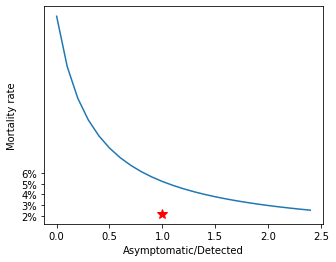

In [11]:
plt.figure(figsize=(5,4))
plt.plot(f_asympt_grid,mortality_rate(f_asympt_grid)*100)
plt.xlabel('Asymptomatic/Detected')
plt.ylabel('Mortality rate')
plt.yticks([1,2,3,4,5,6],['1%','2%','3%','4%','5%','6%'])
plt.plot(1,2.2,marker='*',color='red',markersize=11)
plt.savefig('mortality_rate_plot.png',dpi=300)
plt.show()

In [12]:
def func_plot(df):
    y_world=[]
    n_cols=df.shape[1]
    #print(n_cols)
    for i in range(n_cols-4):
        y_world.append(df.iloc[:,i+4].sum())
    
    x_world2=df.columns[4:]
    x_world=pd.to_datetime(x_world2,infer_datetime_format=False)
    
    return (x_world,y_world)

peppe=func_plot(df_confirmed)

In [13]:
######## INPUT PARAMETERS ########
country='Germany'
t0=pd.to_datetime('2020-02-21')
#################################

mask_coun=df_confirmed['Country/Region']==country   # you can change the country here
mask_coun_rec=df_recovered['Country/Region']==country

df_confirmed_coun=df_confirmed.loc[mask_coun,:]
df_deaths_coun=df_deaths.loc[mask_coun,:]
df_recovered_coun=df_recovered.loc[mask_coun_rec,:]

#somma tutte le ultime colonne (cioè valori dell'ultimo giorno) 
#dei 3 files, deaths, recovered, confirmed, per avere il TOT mondiale 
deaths_world_coun=df_deaths_coun.iloc[:,-1].sum()
recovered_world_coun=df_recovered_coun.iloc[:,-1].sum()
total_world_coun=df_confirmed_coun.iloc[:,-1].sum()

max_death_rate_coun=round(deaths_world_coun/(deaths_world_coun+recovered_world_coun)*100,1)
min_death_rate_coun=round(deaths_world_coun/total_world_coun*100,1)

print('Total contaminated:',country,total_world_coun)
print('Total deaths',country,deaths_world_coun)
print('Total recovered ',country,recovered_world_coun)

print('Based on the WHO data, the death rate in',country,'is between',min_death_rate_coun,'% and',max_death_rate_coun,'% of the total confirmed case')

Total contaminated: Germany 150648
Total deaths Germany 5279
Total recovered  Germany 99400
Based on the WHO data, the death rate in Germany is between 3.5 % and 5.0 % of the total confirmed case


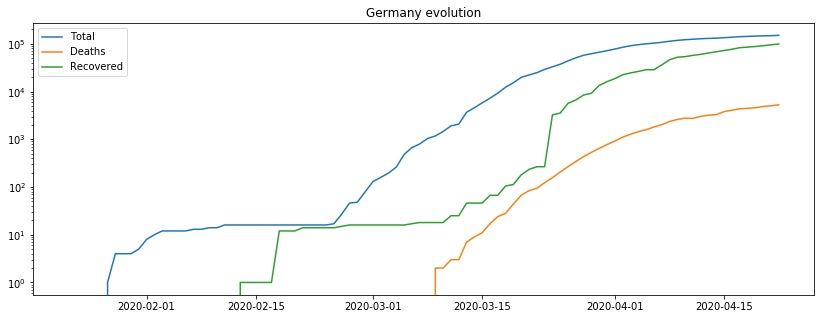

In [14]:
plt.figure(figsize=(14,5))
plt.plot(func_plot(df_confirmed_coun)[0],func_plot(df_confirmed_coun)[1],label='Total')
plt.plot(func_plot(df_deaths_coun)[0],func_plot(df_deaths_coun)[1],label='Deaths')
plt.plot(func_plot(df_recovered_coun)[0],func_plot(df_recovered_coun)[1],label='Recovered')
plt.legend()
plt.yscale('log')
plt.title(country+' evolution')
plt.savefig('country_plot.png',dpi=300)
plt.show()

In [15]:
ytot=np.array(func_plot(df_confirmed_coun)[1])
ydeaths=np.array(func_plot(df_deaths_coun)[1])
yrec=np.array(func_plot(df_recovered_coun)[1])

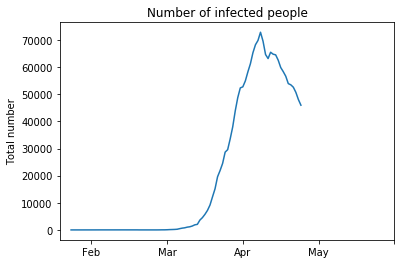

In [15]:
plt.plot(ytot-ydeaths-yrec)
#plt.yscale('log')
plt.xticks(np.arange(8,130,30),['Feb','Mar','Apr','May'])
plt.ylabel('Total number')
plt.title('Number of infected people')
plt.savefig('activegermany.png',dpi=300)
plt.show()

In [16]:
#Generalization to other countries

def whichcountry(name):
        
    ######## INPUT PARAMETERS ########
    country=name
    t0=pd.to_datetime('2020-02-21')
    #################################

    mask_coun=df_confirmed['Country/Region']==country   # you can change the country here
    mask_coun_rec=df_recovered['Country/Region']==country

    df_confirmed_C=df_confirmed.loc[mask_coun,:]
    df_deaths_C=df_deaths.loc[mask_coun,:]
    df_recovered_C=df_recovered.loc[mask_coun_rec,:]

    ytot=np.array(func_plot(df_confirmed_C)[1])
    ydeaths=np.array(func_plot(df_deaths_C)[1])
    yrec=np.array(func_plot(df_recovered_C)[1])

    return ytot-ydeaths-yrec, ytot[-1], yrec[-1],ydeaths[-1]

In [17]:
print(whichcountry('Portugal')[1])#confirmed last day
print(whichcountry('Portugal')[2])#recovered last day

21982
1143


In [18]:
#definition of time
df_time=pd.to_datetime(np.arange(len(ytot)),unit='D',origin=pd.Timestamp('2020-01-22'))

# list of top countries , with the higher number of cases

df_nofcases=pd.DataFrame(np.array(df_confirmed.iloc[:,1]))
df_nofcases.columns=['Country']
df_nofcases['Confirmed']=df_confirmed.iloc[:,-1]

df_nofcases
#np.array(df_nofcases.sort_values(by='Confirmed',ascending=False).head(6)['Country'])

,Country,Confirmed
0,Afghanistan,1176
1,Albania,634
2,Algeria,2910
3,Andorra,723
4,Angola,25
...,...,...
259,France,1
260,South Sudan,4
261,Western Sahara,6
262,Sao Tome and Principe,4


In [19]:
countries_list=['Spain', 'Italy', 'Germany', 'France', 'UK', 'Portugal', 'Sweden', 'Belgium', 'Austria']

In [20]:
df_active=pd.DataFrame(whichcountry('Spain')[0])
df_active.columns=['Spain']
df_active.index=df_time

for i in range(1,len(countries_list)):
    df_active[countries_list[i]]=whichcountry(countries_list[i])[0]

df_active.columns=['Spain','Italy','Germany','France','UK', 'Portugal', 'Sweden', 'Belgium', 'Austria']

In [21]:
df_active.to_csv('active_infected',index=True)

In [22]:
data = pd.read_csv('/Users/maddalena/Desktop/CovStat/active_infected')

In [23]:
xdata=pd.to_numeric(range(data.shape[0]))

In [24]:
n_countries = len(countries_list)

In [25]:
today=len(xdata)

In [26]:
def minimizer(name,R0,t1=today-5,t2=today):
    array_country=whichcountry(name)[0]
    
    #true data
    ydata_inf_2=array_country[t1:t2]
    xdata_2=np.arange(0,len(ydata_inf_2))
    
    #model
    fin_result=time_evo(60*10**6,0.1*R0,0.1,I0=ydata_inf_2[0])
    i_vec=fin_result[2]
    i_vec_2=i_vec[0:len(xdata_2)]
    
    #average error
    error=np.sum(np.abs(ydata_inf_2-i_vec_2)/ydata_inf_2)*100
    return error

minimizer_vec=np.vectorize(minimizer)

In [30]:
#time(minimizer('Spain', 3.0, 10, 20))

In [27]:
#definition of the ideal r0

xgrid=np.arange(0,2,0.01)
ygrid=minimizer_vec('Spain',xgrid)
r0_ideal=round(xgrid[np.argmin(ygrid)],2)

In [32]:
#time(round(xgrid[np.argmin(ygrid)],2))

In [33]:
#time(minimizer_vec('Spain',xgrid))

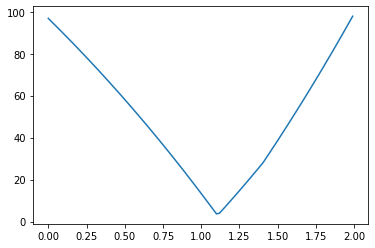

In [34]:
plt.plot(xgrid,ygrid)
plt.show()

In [28]:
#ydata_inf_2=np.array(ydata[today-5:today])
xdata_2=np.arange(0,len(ydata_inf_2))

#fin_result=time_evo(60*10**6,0.1*r0_ideal,0.1,I0=ydata_inf_2[0])

NameError: name 'ydata' is not defined

In [ ]:
t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]

In [35]:
time_window=5

def minimizer_gen(name,t1,t2,xgrid):
    
    #xgrid=np.arange(1,11,0.01)
    ygrid=minimizer_vec(name,xgrid,t1=t1,t2=t2)
    r0_ideal=round(xgrid[np.argmin(ygrid)],2)

    return r0_ideal

In [1]:
#time(minimizer_vec('Spain', range(100),1, 5))

In [39]:
r0_time=[]
scangrid=np.linspace(0,5,50)

for name in countries_list:
     for i in range(today-(time_window-1)):
        min_val=minimizer_gen(name,i,i+time_window,scangrid)
        r0_time.append(min_val)
        scangrid=np.linspace(0,min_val+1,80)  #the grid changes over the time (this speeds up the process)
        print(i,min_val)
R0_countries.append([name, r0_time])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 1.0
11 0.99
12 1.01
13 0.99
14 1.01
15 2.01
16 2.74
17 3.27
18 0.97
19 1.0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 1.0
35 2.0
36 3.0
37 4.0
38 5.0
39 4.25
40 3.99
41 3.6
42 3.61
43 4.03
44 4.14
45 4.75
46 4.59
47 4.53
48 4.13
49 4.09
50 5.09
51 2.85
52 2.92
53 2.88
54 2.7
55 2.9
56 2.86
57 2.54
58 2.6
59 2.51
60 2.62
61 2.34
62 2.41
63 2.03
64 1.8
65 1.7
66 1.71
67 1.68
68 1.56
69 1.43
70 1.35
71 1.25
72 1.22
73 1.18
74 1.19
75 1.11
76 1.07
77 1.07
78 1.07
79 1.05
80 1.01
81 1.04
82 1.14
83 1.27
84 1.32
85 1.32
86 1.12
87 1.1
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 1.0
10 0.99
11 1.01
12 1.02
13 2.02
14 2.03
15 2.34
16 1.01
17 0.99
18 1.01
19 0.99
20 1.01
21 0.99
22 1.01
23 0.99
24 1.01
25 0.99
26 1.01
27 0.99
28 1.01
29 2.01
30 3.01
31 4.01
32 4.57
33 4.3
34 4.23
35 4.1
36 3.87
37 3.58
38 3.54
39 2.82
40 2.95
41 2.9
42 3.11
43 3.17
44 3.38
45 2.88
46 2.6
47 2.42
48 2.77
49 2.67
50 3.21
51 2.45
52 2.27
53 2.19
54 2.22
55 2.24
56 2.3
57 2.13
58 1.9
59 1.8
60 1.7
61 1.67
62 1.66
63 1.6

NameError: name 'R0_countries' is not defined

In [1]:
#print(r0_time)

In [59]:
r0_countries0=np.transpose(np.reshape(r0_time, (len(countries_list),today-(time_window-1))))
print(r0_countries0)

[[0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.95 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   2.28 0.   0.   0.   0.   0.  ]
 [0.   0.   1.   2.7  0.   0.   0.   0.   0.  ]
 [0.   0.   1.75 2.01 0.   0.   0.   0.   0.  ]
 [0.   0.   2.75 1.45 0.   0.   0.   0.   0.  ]
 [0.   0.   3.75 1.46 0.   0.   0.   0.   0.  ]
 [0.   1.   3.91 1.59 0.   0.   1.   0.   0.  ]
 [1.   0.99 2.36 1.02 0.   0.   0.99 0.   0.  ]
 [0.99 1.01 1.62 1.   0.   0.   1.01 0.   0.  ]
 [1.01 1.02 0.99 0.99 0.   0.   0.99 0.   0.  ]
 [0.99 2.02 1.21 1.01 0.   0.   1.01 1.   0.  ]
 [1.01 2.03 1.37 2.01 0.   0.   0.99 0.99 0.  ]
 [2.01 2.34 1.41 2.51 0.   0.   1.01 1.01 0.  ]
 [2.74 1.01 1.37 3.02 0.   0.   0.99 0.99 0.  ]
 [3.27 0.99 1.53 0.97 0.   0.   1.01 1.01 0.  ]
 [0.97 1.01 1.18 0.5  0.   0.   0.99 0.99 0.  ]
 [1.   0.99 1.21 0.34 0.   0.   1.01 1.01 0.  ]
 [0.   1.01 0.81 0.   0.   0.   0.99 0.9

In [44]:
r0_countries=pd.DataFrame(r0_countries0,pd.to_datetime(np.arange(len(r0_countries0)),unit='D',origin='2020-01-22'))

r0_countries.columns   = ['Spain','Italy','Germany','France','UK', 'Portugal', 'Sweden', 'Belgium', 'Austria']
print(r0_countries)

In [63]:
r0_countries.to_csv('output_countries/r0_countries_allinone.csv',index=False)

In [29]:
r0_countries_imp = pd.read_csv('output_countries/r0_countries_allinone.csv')

In [42]:
#print(r0_countries_imp['Spain'])

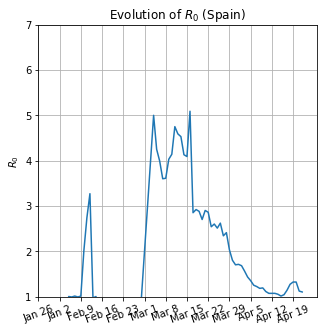

In [36]:
plt.figure(figsize=(5,5))
plt.plot(r0_countries_imp['Spain'])
plt.xticks(np.arange(0-(time_window-5),90,7),['Jan 26','Jan 2','Feb 9','Feb 16','Feb 23','Mar 1','Mar 8', 'Mar 15', 'Mar 22', 'Mar 29', 'Apr 5', 'Apr 12', 'Apr 19'],rotation=20)
plt.xlim(0,today)
plt.ylabel('$R_0$')
plt.ylim(1,7)
plt.grid()
plt.title('Evolution of $R_0$ (Spain)')
#plt.savefig('output_countries/r0-evo_Spain.png',dpi=300)
plt.show()